## Clasificación de imágenes

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam


In [2]:
labels = os.listdir("PokemonData")
num = len(labels)
print(labels)

['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking', 'Ni

In [3]:
stored = {}
def input_target_split(train_dir,labels):
    dataset = []
    count = 0
    for label in labels:
        folder = os.path.join(train_dir,label)
        for image in os.listdir(folder):
            
#             print(os.path.join(folder,image))
            try:
                img=load_img(os.path.join(folder,image), target_size=(150,150))
                img=img_to_array(img)
                img=img/255.0
                dataset.append((img,count))
            except:
                pass

        print(f'\rCompleted: {label}',end='')
        stored[label] = count
        count+=1
    random.shuffle(dataset)
    X, y = zip(*dataset)
    
    return np.array(X),np.array(y)

In [4]:
X, y = input_target_split("PokemonData", labels)

Completed: Zubatstuffdslash

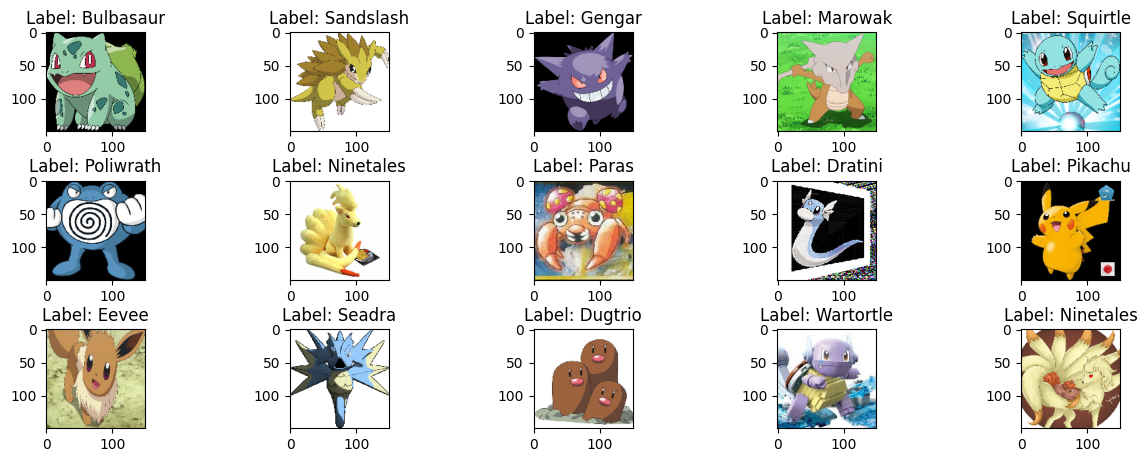

In [5]:
plt.figure(figsize = (15 , 9))
n = 0
for i in range(15):
    n+=1
    plt.subplot(5 , 5, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    plt.imshow(X[i])
    plt.title(f'Label: {labels[y[i]]}')

In [6]:
np.unique(y)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)
print(np.unique(y_train,return_counts=True),np.unique(y_test,return_counts=True))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149]), array([28, 29, 22, 34, 32, 33, 38, 27, 28, 33, 34, 15, 33, 35, 29, 43, 32,
       33, 39, 43, 32, 35, 27, 28, 34, 27, 33, 35, 21, 32, 35, 30, 31, 36,
       40, 30

In [8]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=20,
                             zoom_range=0.2,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range=0.1,
                             fill_mode="nearest")

testgen = ImageDataGenerator()

datagen.fit(X_train)
testgen.fit(X_test)

In [9]:
y_train = np.eye(num)[y_train]
y_test = np.eye(num)[y_test]

In [10]:
img_size = 150
base_model = VGG16(include_top = False,
                         weights = 'imagenet',
                         input_shape = (img_size,img_size,3))
base_model.trainable = False

In [11]:
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(150, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [12]:
filepath= "model_pokemon.h5"

early_stopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.00001)

callbacks_list = [
        early_stopping,
        learning_rate_reduction
    ]

In [13]:
hist = model.fit(datagen.flow(X_train,y_train,batch_size=32),
                                        validation_data=testgen.flow(X_test,y_test,batch_size=32),
                                        epochs=10,
                                        callbacks=callbacks_list)

Epoch 1/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 1362s 8s/step - accuracy: 0.0277 - loss: 4.9848 - val_accuracy: 0.1425 - val_loss: 4.0008 - learning_rate: 0.0010
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 1439s 9s/step - accuracy: 0.1691 - loss: 3.8246 - val_accuracy: 0.3389 - val_loss: 2.8937 - learning_rate: 0.0010
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 1556s 9s/step - accuracy: 0.3212 - loss: 2.9770 - val_accuracy: 0.3948 - val_loss: 2.4579 - learning_rate: 0.0010
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 1581s 9s/step - accuracy: 0.3940 - loss: 2.5057 - val_accuracy: 0.4780 - val_loss: 2.1913 - learning_rate: 0.0010
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 1578s 9s/step - accuracy: 0.4747 - loss: 2.1661 - val_accuracy: 0.5386 - val_loss: 1.9075 - learning_rate: 0.0010
Epoch 6/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 924s 5s/step - accuracy: 0.5169 - loss: 1.9314 - val_accuracy: 0.5566 - val_loss: 1.7671 - learning_rate: 0.0010
Epoch 7/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 703s 4s/step - accuracy: 0.5442 - los

In [14]:
y_pred = model.predict(X_test)
pred = np.argmax(y_pred,axis=1)
print(pred)

47/47 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step
[ 34 102  88 ... 121  81  32]


In [15]:
ground = np.argmax(y_test,axis=1)

In [16]:
from sklearn.metrics import classification_report

print(classification_report(ground,pred,target_names = labels))

                  precision    recall  f1-score   support

            Abra       0.56      0.71      0.62         7
      Aerodactyl       0.50      0.50      0.50         6
        Alakazam       0.36      1.00      0.53         4
Alolan Sandslash       0.80      0.57      0.67         7
           Arbok       1.00      0.89      0.94         9
        Arcanine       0.62      0.62      0.62         8
        Articuno       0.50      1.00      0.67         7
        Beedrill       1.00      0.43      0.60         7
      Bellsprout       0.88      0.58      0.70        12
       Blastoise       0.67      0.44      0.53         9
       Bulbasaur       0.70      1.00      0.82         7
      Butterfree       0.91      0.83      0.87        12
        Caterpie       0.67      1.00      0.80         4
         Chansey       0.57      0.50      0.53         8
       Charizard       0.19      0.67      0.30         6
      Charmander       0.57      0.50      0.53         8
      Charmel

In [17]:
y_pred

array([[7.8967309e-19, 4.8528090e-16, 1.9896500e-26, ..., 2.1433716e-10,
        1.1998070e-18, 2.6761118e-10],
       [1.5380592e-04, 1.1954467e-09, 3.2531335e-07, ..., 1.3602563e-07,
        2.1150562e-11, 4.3468424e-09],
       [4.0889462e-03, 9.7502831e-05, 3.0325907e-03, ..., 9.3726626e-09,
        4.4905383e-13, 4.0145419e-06],
       ...,
       [4.0840951e-06, 1.3323799e-04, 7.2259159e-04, ..., 7.4117420e-06,
        2.5625777e-10, 3.7271887e-04],
       [7.2018616e-07, 5.3065579e-09, 4.5057369e-14, ..., 3.5498232e-08,
        9.5950939e-16, 9.0495456e-04],
       [8.6241480e-06, 1.2727456e-07, 7.3282846e-10, ..., 2.4088995e-06,
        1.6092025e-14, 8.3089871e-03]], dtype=float32)

In [18]:
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([ 34, 102,  88, ..., 121,  81,  32], dtype=int64)

In [19]:
y_true = np.argmax(y_test,axis=1)
y_true

array([ 34, 102,  71, ..., 121,  81,  32], dtype=int64)

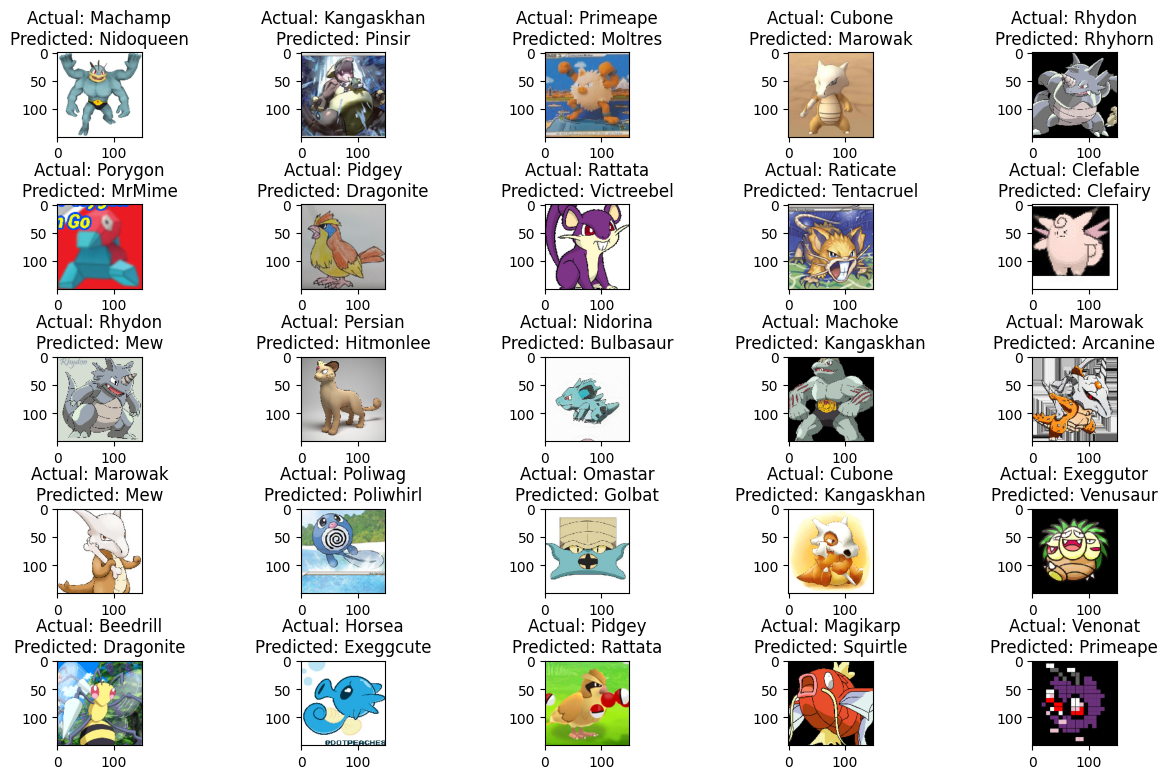

In [20]:
plt.figure(figsize = (15 , 9))
n = 0
for i in range(len(X_test)):
    if y_pred[i] != y_true[i]:
        n+=1
        if n <= 25:
            plt.subplot(5 , 5, n)
            plt.subplots_adjust(hspace = 0.8 , wspace = 0.3)
            plt.imshow(X_test[i])
            plt.title(f'Actual: {labels[y_true[i]]}\nPredicted: {labels[y_pred[i]]}')